## Lesson-01 Assignment

#### 今天是2020年08月16日，今天世界上又多了一名AI工程师 :) 

## 本次作业的内容

#### 1. 复现课堂代码

在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

#### 2. 完成以下问答和编程练习

## 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: {Put your answer here}

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: {Put your answer here}

#### 2. What's the Probability Model?

Ans:

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:

#### 5. What's the Language Model;

Ans:

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:

#### 7. What's the 1-gram language model;

Ans:

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:

#### 9. What't the 2-gram models;

Ans:

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1569578233461&di=4adfa7597fb380e7cc0e67190bbd7605&imgtype=0&src=http%3A%2F%2Fs1.sinaimg.cn%2Flarge%2F006eYYfyzy76cmpG3Yb1f)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [36]:
you_need_replace_this_with_name_you_given = '''
host = 引导 | 服务 | 寒暄
引导 = 打招呼 指路 | 指路 关心
指路 = 请走右边 | 继续向前 | 我也不认识
关心 = 小心脚下 | 小心柱子 | 当心头
服务 = 打招呼 称谓 询问 业务 | 打招呼 称谓 询问 业务 吗？
询问 = 请问是需要 | 是需要
业务 = 射击 | 开impart |  玩游戏
打招呼 = 你好, | 您好,
称谓 = 先生 | 小姐 | 女士 | 小朋友 | 贵宾
寒暄 = 打招呼 称谓
'''

In [37]:
def create_grammar(grammar_str,split='=>',line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split): #以换行符分割
        if not line.strip():
            continue
        exp,stmt = line.split(split)   #exp为=前部分，stmt为分割部分
        grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    return grammar

In [38]:
create_grammar(grammar_str=you_need_replace_this_with_name_you_given,split='=')

{'host': [['引导'], ['服务'], ['寒暄']],
 '引导': [['打招呼', '指路'], ['指路', '关心']],
 '指路': [['请走右边'], ['继续向前'], ['我也不认识']],
 '关心': [['小心脚下'], ['小心柱子'], ['当心头']],
 '服务': [['打招呼', '称谓', '询问', '业务'], ['打招呼', '称谓', '询问', '业务', '吗？']],
 '询问': [['请问是需要'], ['是需要']],
 '业务': [['射击'], ['开impart'], ['玩游戏']],
 '打招呼': [['你好,'], ['您好,']],
 '称谓': [['先生'], ['小姐'], ['女士'], ['小朋友'], ['贵宾']],
 '寒暄': [['打招呼', '称谓']]}

In [39]:
import random
def generate(gram,target):
    if target not in gram:
        return target
    expand = [generate(gram,t) for t in random.choice(gram[target])]
    return ''.join(e if e !='\n'else '\n' for e in expand if e != '')

In [41]:
for i in range(20):
    print(generate(create_grammar(you_need_replace_this_with_name_you_given,split='='),target='host'))

你好,小朋友是需要开impart吗？
您好,请走右边
您好,我也不认识
继续向前小心脚下
你好,贵宾请问是需要玩游戏
你好,先生
您好,继续向前
我也不认识小心柱子
您好,先生请问是需要射击吗？
你好,小姐请问是需要射击吗？
你好,女士
你好,小朋友
您好,贵宾
请走右边小心柱子
您好,请走右边
你好,小姐
您好,女士是需要开impart吗？
您好,贵宾
您好,继续向前
您好,先生请问是需要射击


> **评阅点**： 是否提出了和课程上区别较大的语法结构

第二个语法：

In [ ]:
you_need_replace_this_with_name_you_given = '''
# you code here
'''

> **评阅点**：是否和上一个语法区别比较大

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [10]:
def generate_n():
    # you code here 
    pass

> **评阅点**; 运行代码，观察是否能够生成多个句子

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

> **评阅点** 1. 是否使用了新的数据集； 2. csv(txt)数据是否正确解析

In [2]:
import random
import jieba

In [13]:
filename = '../作业数据集/movie_comments.csv'

In [16]:
import pandas as pd
content = pd.read_csv(filename)


C:\Users\19031\AppData\Local\Temp\ipykernel_17940\3183632557.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  content = pd.read_csv(filename)


In [17]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [19]:
articles = content['comment'].tolist()

In [20]:
len(articles)

261497

In [21]:
import re

In [23]:
def token(string):
    return re.findall('\w+',string)

In [24]:
from collections import Counter

In [25]:
articles[100]

'wtf???我为啥要看这个'

In [27]:
with_jieba_cut = Counter(jieba.cut(articles[100]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\19031\AppData\Local\Temp\jieba.cache
Loading model cost 0.582 seconds.
Prefix dict has been built successfully.


In [28]:
with_jieba_cut

Counter({'wtf': 1, '?': 3, '我': 1, '为啥': 1, '要': 1, '看': 1, '这个': 1})

In [29]:
with_jieba_cut.most_common()[0:10]

[('?', 3), ('wtf', 1), ('我', 1), ('为啥', 1), ('要', 1), ('看', 1), ('这个', 1)]

In [31]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [37]:
with open('../作业数据集/movie_comments.txt','w',encoding='utf-8') as f:
    for a in articles_clean:
        f.write(a+'\n')

In [38]:
def cut(string):
    return list(jieba.cut(string))

In [39]:
TOKEN = []

In [46]:
for i,line in enumerate((open('../作业数据集/movie_comments.txt',encoding='utf-8'))):
    if i %100 == 0:
        print(i)
    if i > 10000:
        break
    TOKEN += cut(line)

0
['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心', '想', '吐', '\n']
['首映礼', '看', '的', '太', '恐怖', '了', '这个', '电影', '不讲道理', '的', '完全', '就是', '吴京', '在', '实现', '他', '这个', '小', '粉红', '的', '英雄', '梦', '各种', '装备', '轮番', '上场', '视', '物理', '逻辑', '于', '不顾', '不得不', '说', '有钱', '真', '好', '随意', '胡闹', '\n']
['吴京', '的', '炒作', '水平', '不输', '冯小刚', '但小刚', '至少', '不会', '用', '主旋律', '来', '炒作', '吴京', '让', '人', '看', '了', '不', '舒服', '为了', '主旋律', '而', '主旋律', '为了', '煽情', '而', '煽情', '让', '人', '觉得', '他', '是', '个', '大', '做作', '大', '谎言', '家', '729', '更新', '片子', '整体', '不如', '湄公河', '行动', '1', '整体', '不够', '流畅', '编剧', '有毒', '台词', '尴尬', '2', '刻意', '做作', '的', '主旋律', '煽情', '显得', '如此', '不合时宜', '而', '又', '多余', '\n']
['凭良心说', '好', '看到', '不像', '战狼', '1', '的', '续集', '完虐', '湄公河', '行动', '\n']
['中二得', '很', '\n']
['犯', '我', '中华', '者', '虽远必', '诛', '吴京', '比', '这句', '话', '还要', '意淫', '一百倍', '\n']
['脑子', '是', '个', '好', '东西', '希望', '编剧', '们', '都', '能', '有', '\n']
['三星', '半', '实打实', '的', '7', '分', '第一集', '在', '爱国', '主旋律', '内部', '做', '着'

In [47]:
from functools import reduce
from operator import add,mul

In [48]:
from collections import Counter

In [71]:
words_count = Counter(TOKEN)

Counter({'的': 32190, '\n': 20002, '了': 12226, '是': 7864, '我': 5354, '都': 4486, '和': 3674, '也': 3482, '在': 3436, '看': 3206, '电影': 3106, '不': 3102, '有': 3092, '很': 2932, '就': 2920, '人': 2674, '好': 2312, '啊': 2104, '你': 2004, '但': 1946, '还': 1904, '这': 1902, '一个': 1816, '还是': 1802, '让': 1540, '没有': 1540, '就是': 1452, '剧情': 1372, '太': 1362, '故事': 1346, '说': 1324, '上': 1306, '到': 1302, '得': 1300, '又': 1236, '给': 1236, '没': 1224, '他': 1200, '最后': 1196, '一部': 1158, '对': 1150, '能': 1120, '被': 1110, '多': 1098, '吧': 1030, '最': 1024, '好看': 1022, '这个': 1014, '要': 992, '可以': 966, '拍': 962, '不错': 956, '喜欢': 954, '真的': 946, '不是': 938, '什么': 938, '动作': 920, '觉得': 906, '与': 896, '把': 880, '戏': 876, '感觉': 830, '演技': 818, '里': 814, '导演': 814, '这么': 810, '自己': 792, '去': 786, '更': 786, '大': 778, '想': 776, '比': 764, '打': 754, '片': 754, '那': 752, '着': 748, '但是': 748, '片子': 730, '这部': 726, '会': 724, '中': 714, '有点': 708, '个': 706, '那么': 702, '真是': 692, '吗': 650, '小': 642, '来': 632, '看到': 626, '这种': 620, '而': 61

In [52]:
words_count.most_common(100)

[('的', 32190),
 ('\n', 20002),
 ('了', 12226),
 ('是', 7864),
 ('我', 5354),
 ('都', 4486),
 ('和', 3674),
 ('也', 3482),
 ('在', 3436),
 ('看', 3206),
 ('电影', 3106),
 ('不', 3102),
 ('有', 3092),
 ('很', 2932),
 ('就', 2920),
 ('人', 2674),
 ('好', 2312),
 ('啊', 2104),
 ('你', 2004),
 ('但', 1946),
 ('还', 1904),
 ('这', 1902),
 ('一个', 1816),
 ('还是', 1802),
 ('让', 1540),
 ('没有', 1540),
 ('就是', 1452),
 ('剧情', 1372),
 ('太', 1362),
 ('故事', 1346),
 ('说', 1324),
 ('上', 1306),
 ('到', 1302),
 ('得', 1300),
 ('又', 1236),
 ('给', 1236),
 ('没', 1224),
 ('他', 1200),
 ('最后', 1196),
 ('一部', 1158),
 ('对', 1150),
 ('能', 1120),
 ('被', 1110),
 ('多', 1098),
 ('吧', 1030),
 ('最', 1024),
 ('好看', 1022),
 ('这个', 1014),
 ('要', 992),
 ('可以', 966),
 ('拍', 962),
 ('不错', 956),
 ('喜欢', 954),
 ('真的', 946),
 ('不是', 938),
 ('什么', 938),
 ('动作', 920),
 ('觉得', 906),
 ('与', 896),
 ('把', 880),
 ('戏', 876),
 ('感觉', 830),
 ('演技', 818),
 ('里', 814),
 ('导演', 814),
 ('这么', 810),
 ('自己', 792),
 ('去', 786),
 ('更', 786),
 ('大', 778),
 ('想', 776),
 

In [53]:
frequences = [f for w,f in words_count.most_common(100)]

In [54]:
frequences

[32190,
 20002,
 12226,
 7864,
 5354,
 4486,
 3674,
 3482,
 3436,
 3206,
 3106,
 3102,
 3092,
 2932,
 2920,
 2674,
 2312,
 2104,
 2004,
 1946,
 1904,
 1902,
 1816,
 1802,
 1540,
 1540,
 1452,
 1372,
 1362,
 1346,
 1324,
 1306,
 1302,
 1300,
 1236,
 1236,
 1224,
 1200,
 1196,
 1158,
 1150,
 1120,
 1110,
 1098,
 1030,
 1024,
 1022,
 1014,
 992,
 966,
 962,
 956,
 954,
 946,
 938,
 938,
 920,
 906,
 896,
 880,
 876,
 830,
 818,
 814,
 814,
 810,
 792,
 786,
 786,
 778,
 776,
 764,
 754,
 754,
 752,
 748,
 748,
 730,
 726,
 724,
 714,
 708,
 706,
 702,
 692,
 650,
 642,
 632,
 626,
 620,
 612,
 606,
 606,
 604,
 602,
 590,
 590,
 588,
 582,
 576]

In [55]:
import matplotlib.pyplot as plt
import numpy as np

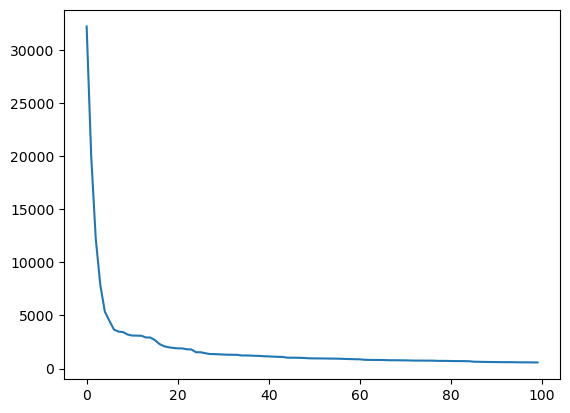

In [61]:
x = [i for i in range(100)]
plt.plot(x,frequences)

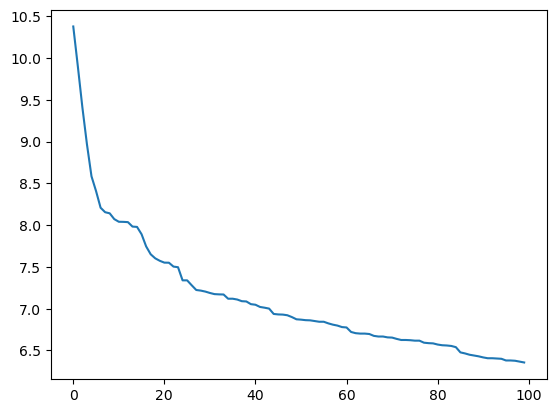

In [62]:
plt.plot(x,np.log(frequences))

In [68]:
def two_gram(word1,word2):
    if word1 + word2 in words_count:
        return words_count[word1+word2]/words_count[word1]
    else:
        return 1/len(TOKEN)

In [77]:
print(two_gram('好','看'))
print(two_gram('难','看'))

0.4420415224913495
0.7884615384615384


In [78]:
def get_probability(sentence):
    words  = cut(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):#除去最后一个标点
        next = words[i+1]
        probability = two_gram(word,next)

        sentence_pro *= probability
    return sentence_pro

In [82]:
print(get_probability('战狼2是垃圾'))
print(get_probability('战狼2好看'))
print(get_probability('红海行动好看'))

6.982192426338492e-18
3.653097041845152e-12
3.653097041845152e-12


#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



提示，要实现这个函数，你需要Python的sorted函数

In [13]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [15]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [16]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [17]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

>

In [20]:
def generate_best(): # you code here
    pass

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

> **评阅点**： 是否使用 lambda 语法进行排序

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:

>**评阅点**: 是否提出了比较实际的问题，例如OOV问题，例如数据量，例如变成 3-gram问题。

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 另外一份作业文件里有个optional，有兴趣的同学可以挑战一下

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)